In [2]:
import os
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
#os.getenv('OPENAI_API_KEY')

### OpenAI Basic Chat API

In [5]:
import json
from openai import OpenAI

In [6]:
client = OpenAI()

In [11]:
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    n=1,
    temperature=0.5,
    messages=[
        {
            "role": "user",
            "content": "Who won first cricket worldcup?",
        }
    ]
)
response.choices[0].message.content

'The first Cricket World Cup was won by the West Indies in 1975.'

Check tokens calculation [https://platform.openai.com/tokenizer](https://platform.openai.com/tokenizer)

Check Pricing for tokens [https://openai.com/api/pricing/](https://openai.com/api/pricing/)

### Grammar correction

In [7]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with statements, and your task is to convert them to standard English."
    },
    {
      "role": "user",
      "content": "She no went to the market."
    }
  ],
  temperature=0.7,
  max_tokens=64,
)

response.choices[0].message.content

'She did not go to the market.'

### Emoji Translation

In [14]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with text, and your task is to translate it into emojis. Do not use any regular text. Do your best with emojis only."
    },
    {
      "role": "user",
      "content": "Artificial intelligence is a technology with great promise."
    }
  ],
  temperature=0.8,
  max_tokens=64,
)
print(response.choices[0].message.content)

🤖💡✨


### Explain code

In [13]:
response = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {
      "role": "system",
      "content": "You will be provided with a piece of code, and your task is to explain it in a concise way."
    },
    {
      "role": "user",
      "content": "build: image: python:alpine script: - python --version"
    }
  ],
  temperature=0.7,
  max_tokens=64,
)
print(response.choices[0].message.content)

This code is a part of a CI/CD (Continuous Integration/Continuous Delivery) pipeline configuration, specifically for GitLab CI/CD configuration.

- `build:`: This is a job name, in this case, the name of the job is "build".
- `image: python:alpine`: This specifies


### Interview questions

In [12]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "user",
      "content": "Create a list of 5 questions for an interview with a Python Lead."
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

1. Can you walk us through a recent project you led using Python and explain the challenges you faced and how you overcame them?
2. How do you ensure code quality and maintainability in a Python project, especially when working with a team of developers?
3. What are some best practices you follow when it comes


### Image Explanation

#### Images are made available to the model in two main ways:
1) by passing a link to the image
2) by passing the base64 encoded image directly in the request. 

#### Image as URL

In [31]:
image_url = "https://pixabay.com/get/gb79c4896f2f0b57f24f29cfce3202d92f974e75254687e901d77ef993b04cae84034106a23a09da7e30c5f63a8ffb2b965b00bc7ec09d4abf7fae65788b53210_1280.jpg"
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= image_url, width=400)

In [32]:
prompt = [
            {
                "type": "text",
                "text": "Can you explain this image to me"
            }
        ]

image_content = {
                    "type": "image_url",
                    "image_url": { "url": image_url}
                }
prompt.append(image_content)

print(prompt)

[{'type': 'text', 'text': 'Can you explain this image to me'}, {'type': 'image_url', 'image_url': {'url': 'https://pixabay.com/get/gb79c4896f2f0b57f24f29cfce3202d92f974e75254687e901d77ef993b04cae84034106a23a09da7e30c5f63a8ffb2b965b00bc7ec09d4abf7fae65788b53210_1280.jpg'}}]


In [28]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

This image shows a close-up of a tabby cat with green eyes. The cat has a relaxed and calm expression on its face. It is resting on a soft, brown surface, possibly a piece of furniture or a pet bed. The background is plain and out of focus, which helps to draw attention to the cat


#### Image as base64 encoded

[{'type': 'text', 'text': 'Can you explain this image to me'}, {'type': 'image_url', 'image_url': {'url': ''}}]

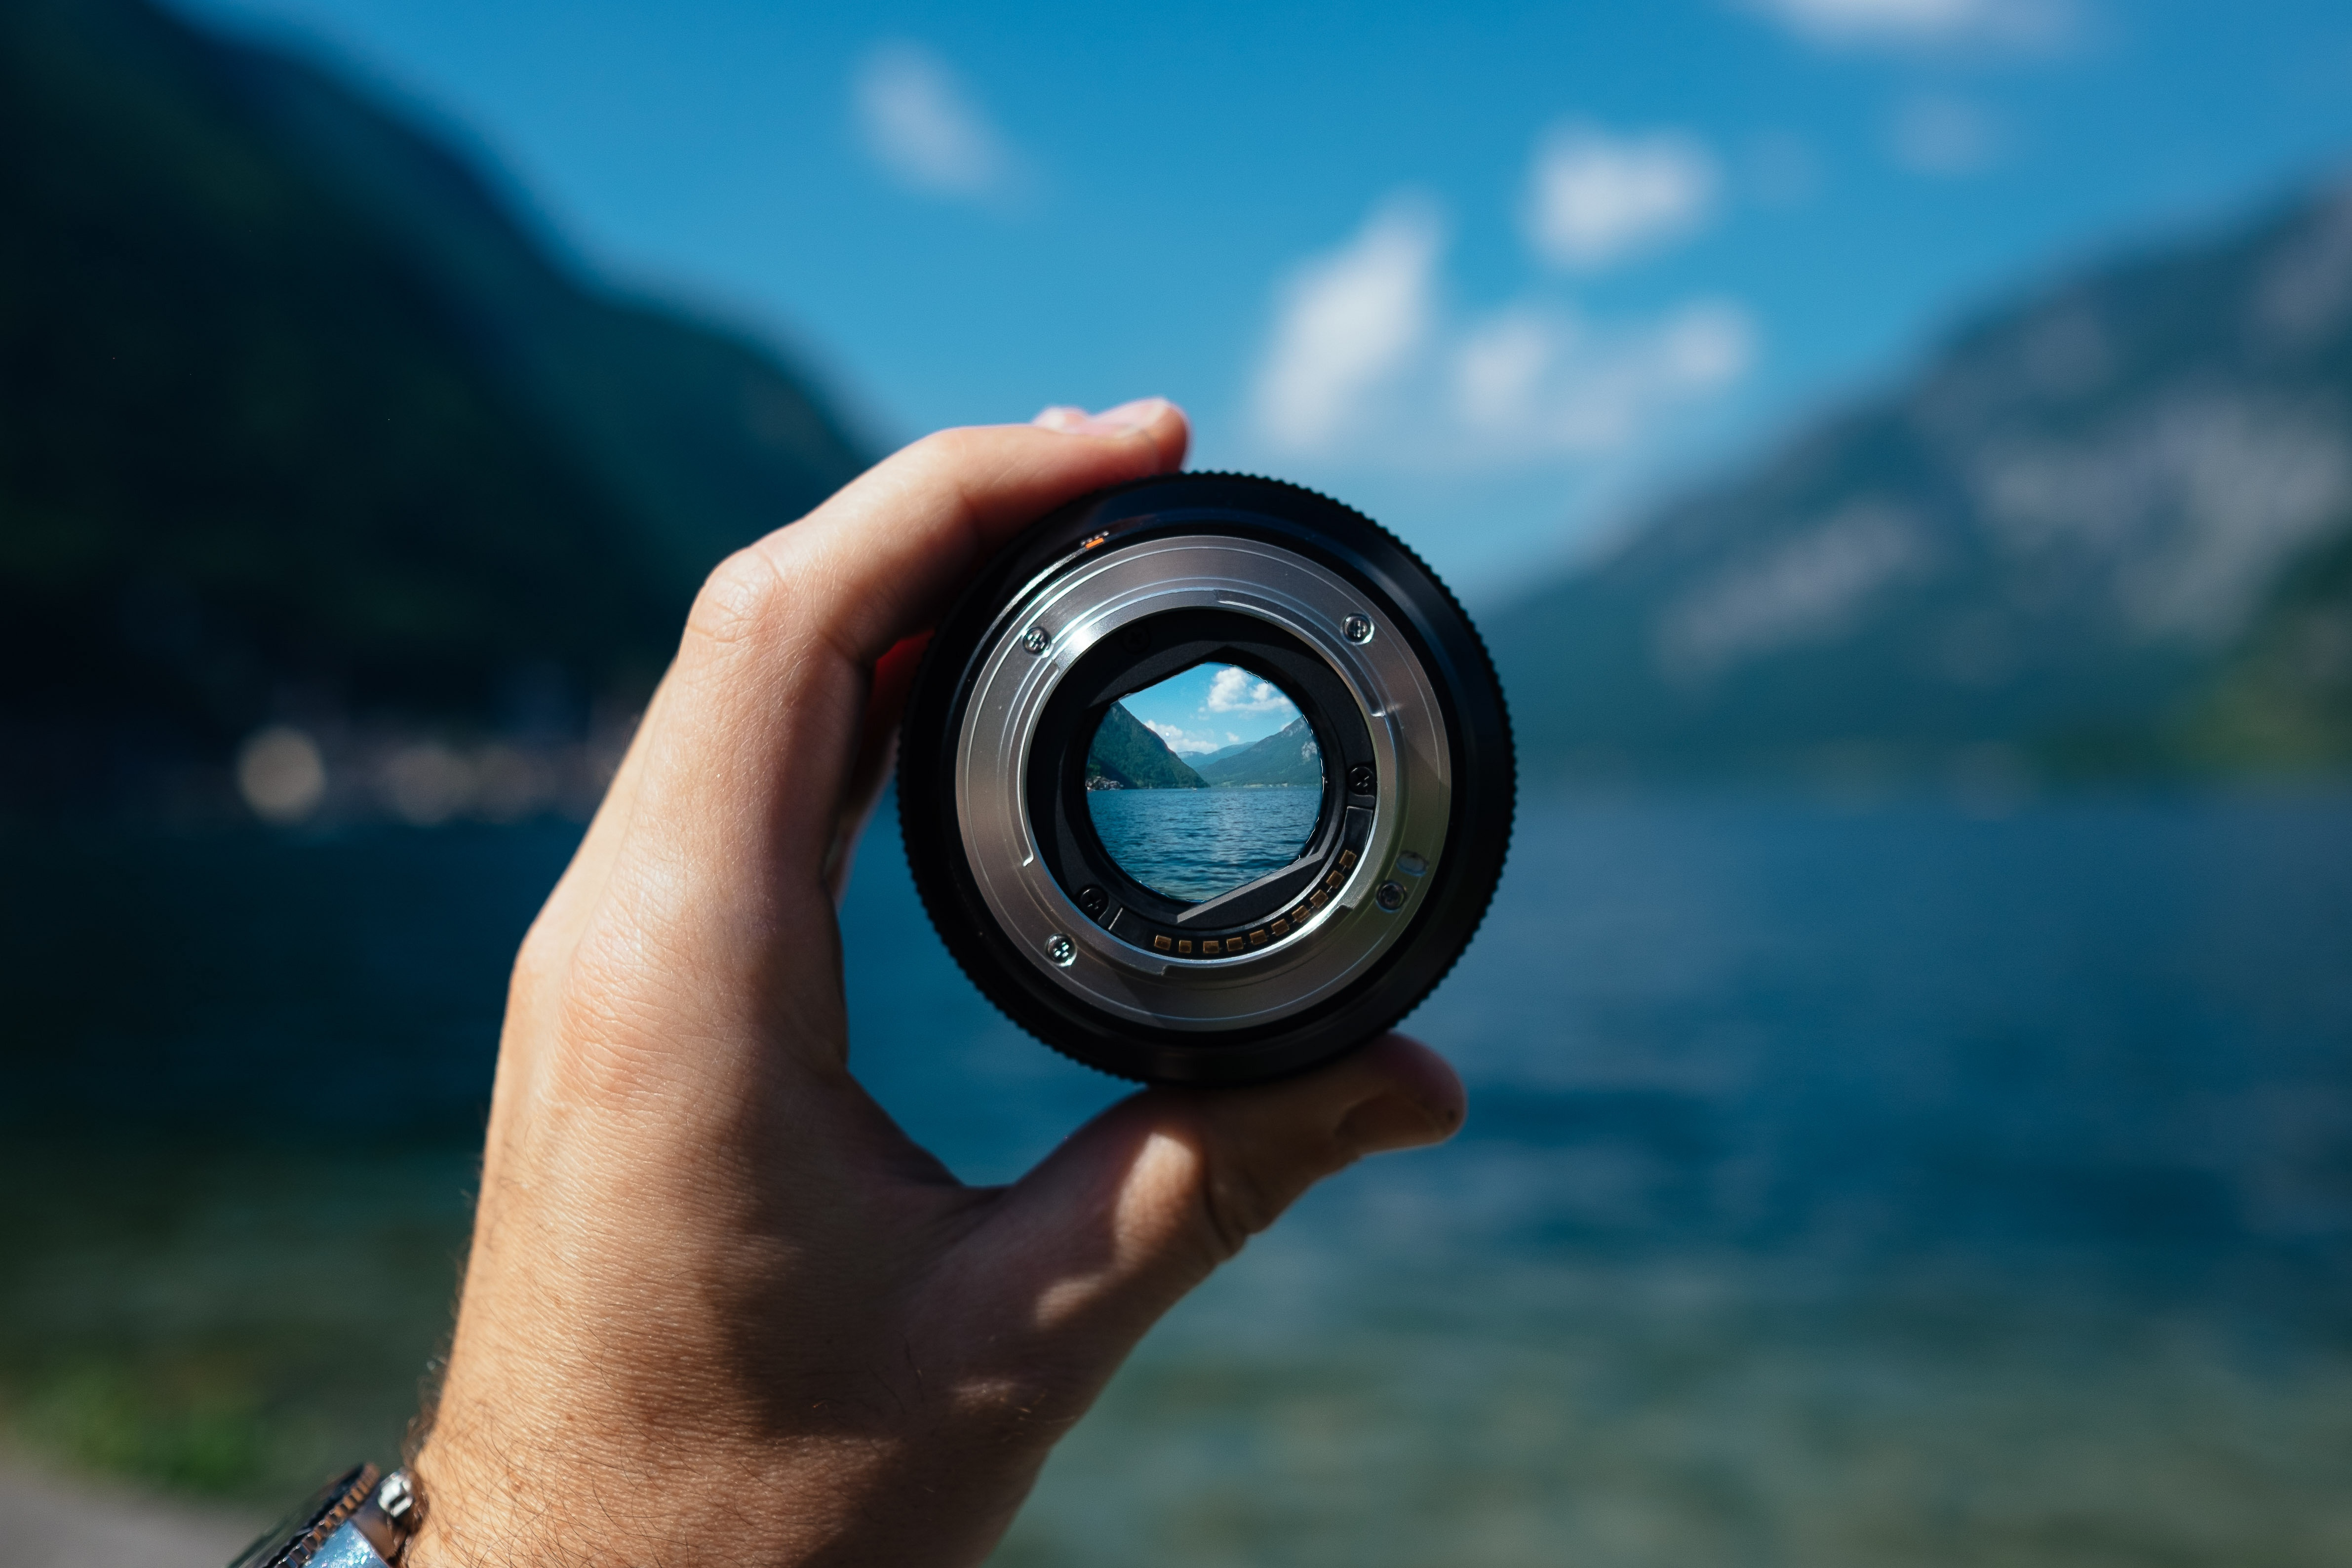

In [33]:
import base64
import requests

# encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "data/image.jpeg"

# Getting the base64 string
base64_image = encode_image(image_path)

prompt = [
            {
                "type": "text",
                "text": "Can you explain this image to me"
            }
        ]

image_url = "https://pixabay.com/get/gb79c4896f2f0b57f24f29cfce3202d92f974e75254687e901d77ef993b04cae84034106a23a09da7e30c5f63a8ffb2b965b00bc7ec09d4abf7fae65788b53210_1280.jpg"
image_content = {
                    "type": "image_url",
                    "image_url": { "url": f"data:image/jpeg;base64,{base64_image}"}
                }
prompt.append(image_content)

print(prompt)


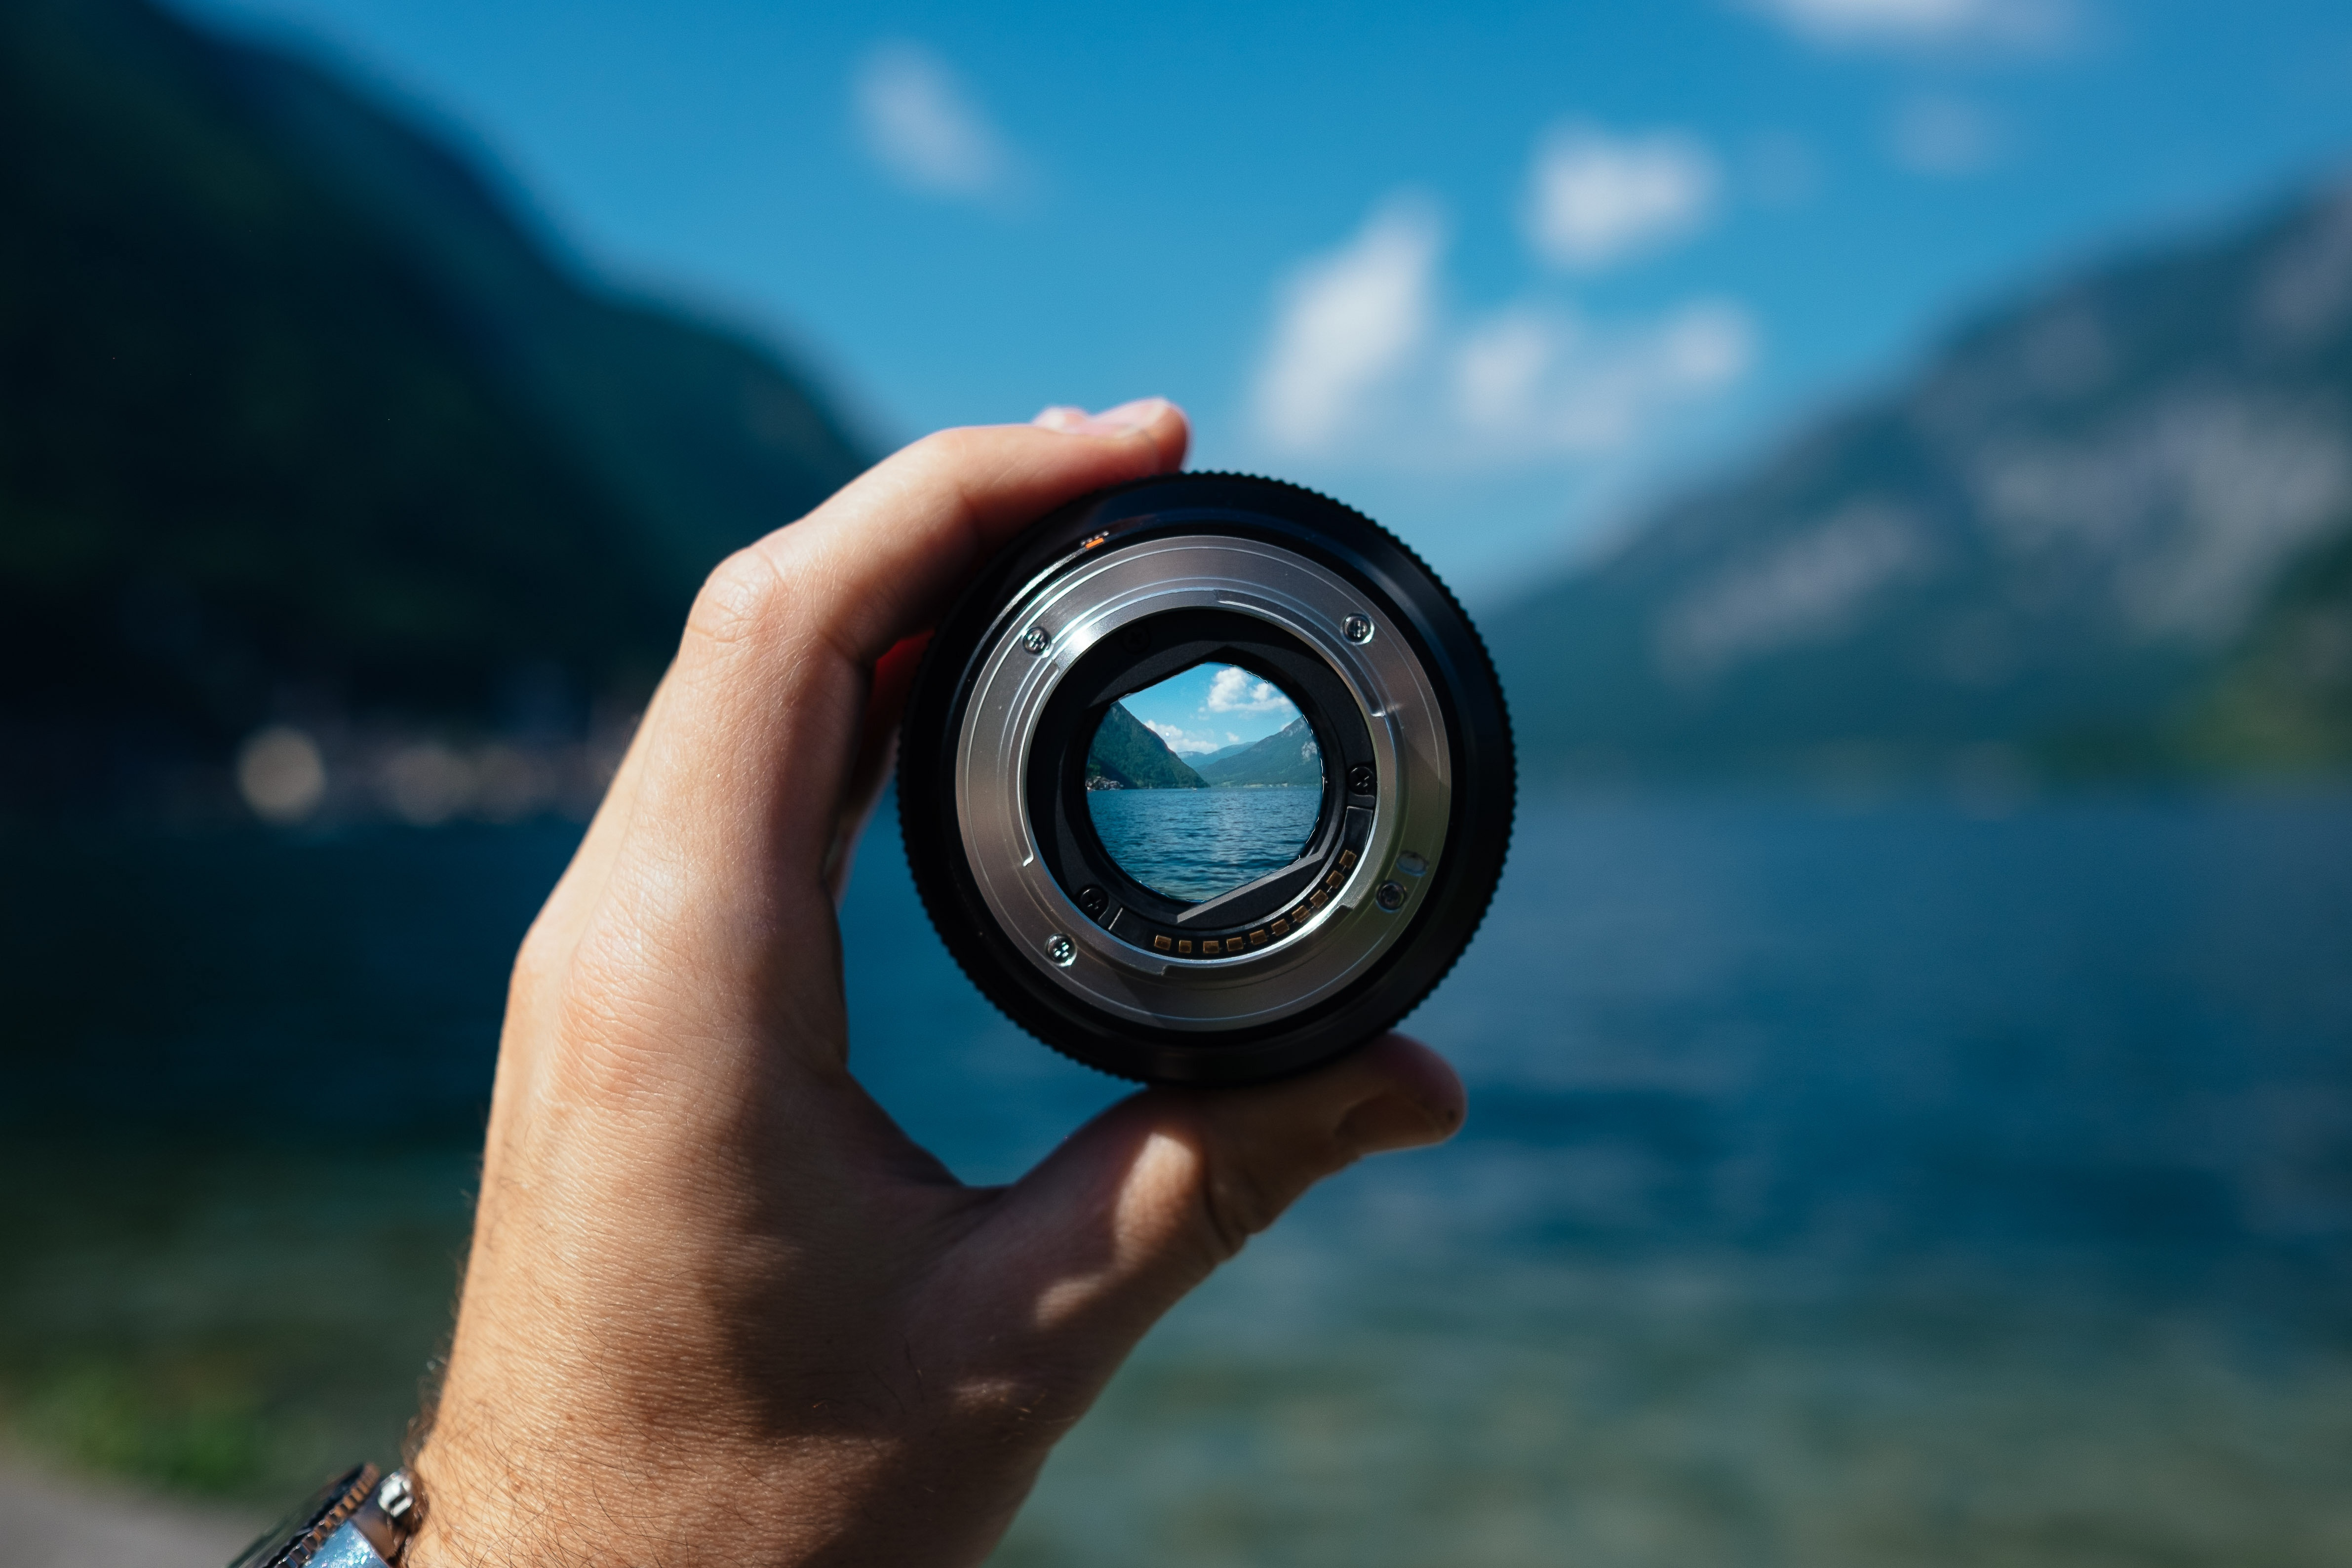

In [35]:
image_url = f"data:image/jpeg;base64,{base64_image}"
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= image_url, width=400)

In [34]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": prompt
    }
  ],
  temperature=0.5,
  max_tokens=64,
)
print(response.choices[0].message.content)

This image shows a hand holding a camera lens against a scenic background of a lake and mountains. The lens is held in such a way that the view through the lens is focused and clear, showing the lake and mountains in sharp detail. The background outside the lens is blurred, creating a contrast between the sharp image within the


### Moderation - Flagging inappropriate content

In [28]:
response = client.moderations.create(input="i want to starve myself?")
response.results[0]

print("\nis Flagged: ", response.results[0].flagged, '\n')

for name, value in dict(response.results[0].categories).items():
    print(name, value)


is Flagged:  True 

harassment False
harassment_threatening False
hate False
hate_threatening False
self_harm True
self_harm_instructions False
self_harm_intent True
sexual False
sexual_minors False
violence False
violence_graphic False
self-harm True
sexual/minors False
hate/threatening False
violence/graphic False
self-harm/intent True
self-harm/instructions False
harassment/threatening False


In [29]:
response = client.moderations.create(input="How to make some explosive chemicals?")
response.results[0]

print("\nis Flagged: ", response.results[0].flagged, '\n')

for name, value in dict(response.results[0].categories).items():
    print(name, value)


is Flagged:  False 

harassment False
harassment_threatening False
hate False
hate_threatening False
self_harm False
self_harm_instructions False
self_harm_intent False
sexual False
sexual_minors False
violence False
violence_graphic False
self-harm False
sexual/minors False
hate/threatening False
violence/graphic False
self-harm/intent False
self-harm/instructions False
harassment/threatening False


### Text to Image

In [36]:
response = client.images.generate(
  model="dall-e-2",
  prompt="a white siamese cat",
  size="256x256",
  quality="standard",
  n=1,
)

image_url = response.data[0].url
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= image_url)

##### The size of the generated images. Must be one of 256x256 , 512x512 , or 1024x1024 for dall-e-2 . Must be one of 1024x1024 , 1792x1024 , or 1024x1792 for dall-e-3 models

### Function Calling
connect large language models to external tools

In [7]:
prompt = f'''
please extract the following information from the given text in JSON format.

year
winner_team
runner_up_team

Information:
First cricket worldcup was played in 1975 between West Indies and Australia. This worldcup was won by West Indies.
'''
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ]
)
json.loads(response.choices[0].message.content)

{'year': 1975, 'winner_team': 'West Indies', 'runner_up_team': 'Australia'}

#### Same as above but using Function Calling

In [8]:
functions = [
    {
        "name": "extract_details",
        "parameters": {
            "type": "object",
            "properties": {
                "year": {"type": "integer"},
                "winner_team": {"type": "string"},
                "runner_up_team": {"type": "string"},
            }
        }
    }
]
response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    functions=functions,
    function_call="auto",
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ]
)
json.loads(response.choices[0].message.function_call.arguments)

{}

### Inline function call

In [9]:
from datetime import datetime, timedelta

In [10]:
prompt = "when is the next cricket match between pakistan and india?"

def get_next_match(team1: str, team2: str):
    # dummy function to return next match date between two teams. this could be replaced with espncricinfo api to get real data
    return json.dumps({"team1": team1, "team2": team2, "next_match_date": str(datetime.today() + timedelta(days=7))})

functions = [
    {
        "name": "get_next_match",
        "parameters": {
            "type": "object",
            "properties": {
                "team1": {"type": "string"},
                "team2": {"type": "string"},
                "next_match_date": {"type": "string"},
            },
            "required": ["team1", "team2"]
        }
    }
]

response1 = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    functions=functions,
    function_call="auto",
    messages=[
        {"role": "user", "content": prompt}
    ]
)
params = json.loads(response1.choices[0].message.function_call.arguments)
get_next_match_func = eval(response1.choices[0].message.function_call.name)(**params)

response2 = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=50,
    functions=functions,
    function_call="auto",
    messages=[
        {"role": "user", "content": prompt},
        {"role": "function", "name": response1.choices[0].message.function_call.name, "content": get_next_match_func}
    ]
)

response2.choices[0].message.content

'The next cricket match between Pakistan and India is scheduled to take place on June 26, 2024 at 01:45:14 UTC.'